<a href="https://colab.research.google.com/github/rhks13/DART/blob/main/%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# **라이브러리 준비**

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

In [ ]:
!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.1-py3-none-any.whl size=53220 sha256=0d033bdb921e58a27115995f43d6472062bb61266e485c5f81d9e3c6c6d9958c
  Stored in directory: /root/.cache/pip/wheels/2f/23/d1/e9c8f5f2e8a61bb4cb8e4fdd0d0c951dab78882e3807c7f7ca
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646666 sha256=cd13f773e627833364b03f3fa34ccc8f7905a7613d9a17529f15a7819d144bf4
  Stored in directory: /root/.cache/pip/wheels/5c/91/bf/14eed6eafd0a83f76eab5cf8eb50ddc0b037f059eec2bd2e4a
Successfully built kss pecab


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/최종_텍스트.csv', index_col =0)
df.dropna(axis=1,inplace=True)
df

,AJ네트웍스,AK홀딩스,BGF,BYC,CJ,CJ CGV,CJ대한통운,CJ제일제당,CS홀딩스,DB손해보험,...,화천기계,화천기공,환인제약,효성,효성ITX,휠라홀딩스,휴니드,휴비스,휴스틸,흥아해운
0,예측정보에 대한 주의사항 이 자료는 미래에 대한 예측정보를 포함하고 있습니다. 당...,"예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상, 예측...",예측정보에 대한 주의사항 당사가 동 사업보고서에서 경영성과 등에 대해 분석한 의견...,예측정보에 대한 주의사항 당사가 이사의 경영진단 의견서에서 미래에 발생할 것으로 ...,"예측정보에 대한 주의사항본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 추...","자료는 회사의 재무상황, 영업실적 및 사업에 관련한 추정, 계획, 예상 등 '예측정...",예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측한...,"예측정보에 대한 주의 사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한...",예측정보에 관한 유의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예...,예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상/예측한...,...,. 예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상.예...,"예측정보에 대한 주의사항본 자료는 미래에 대한 ""예측정보""를 포함하고 있습니다.이...",예측정보에 대한 주의 사항 회사가 동 이사의 경영진단 및 분석의견에서 미래에 발생...,예측정보에 대한 주의사항 회사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측...,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 ·...,예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측한...,". 예측정보에 대한 주의사항 아래 분석의견은 미래에 대한 ""예측정보""를 포함하고 있...",예측정보에 대한 주의사항 당사가 본 경영진단의견서에서 미래에 발생할 것으로 예측...,예측정보에 대한 주의사항 : 당사가 동 사업보고서에서 미래에 발생할 것으로 예상...,. 예측정보에 대한 주의사항당사가 본 경영진단 및 분석의견에서 미래에 발생할 것으로...
1,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상예측한...,"예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상, 예측...",예 측 정보에 대한 주의사항 당사가 동 사업보고서에서 경영성과 등에 대해 분석한...,예측정보에 대한 주의사항 당사가 이사의 경영진단 의견서에서 미래에 발생할 것으로 ...,"예측정보에 대한 주의사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 ...","예측정보에 대한 주의사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 ...",예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측한...,"예측정보에 대한 주의 사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한...",예측정보에 관한 유의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측...,예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상/예측한...,...,. 예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상.예...,"예측정보에 대한 주의사항본 자료는 미래에 대한 ""예측정보""를 포함하고 있습니다.이...",예측정보에 대한 주의사항회사가 동 이사의 경영진단 및 분석의견에서 미래에 발생할 ...,예측정보에 대한 주의사항 회사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측...,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 ·예...,예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측한...,". 예측정보에 대한 주의사항 아래 분석의견은 미래에 대한 ""예측정보""를 포함하고 있...",예측정보에 대한 주의사항 당사가 본 경영진단의견서에서 미래에 발생할 것으로 예측하...,예측정보에 대한 주의사항 : 당사가 동 사업보고서에서 미래에 발생할 것으로 예상...,예측정보에 대한 주의사항당사가 본 경영진단 및 분석의견에서 미래에 발생할 것으로 ...
2,"가 동 사업보고서에서 미래에 발생할 것으로 예상예측한 활동, 사건 또는 현상은 당해...","예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상, 예측...",예 측 정보에 대한 주의사항 당사가 동 사업보고서에서 경영성과 등에 대해 분석한...,예측정보에 대한 주의사항 당사가 이사의 경영진단 의견서에서 미래에 발생할 것으로 ...,"예측정보에 대한 주의사항본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 추...","예측정보에 대한 주의사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 ...",예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측한...,". 예측정보에 대한 주의 사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련...",예측정보에 관한 유의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측...,예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상/예측한...,...,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상.예측...,"예측정보에 대한 주의사항본 자료는 미래에 대한 ""예측정보""를 포함하고 있습니다.이...",예측정보에 대한 주의사항회사가 동 이사의 경영진단 및 분석의견에서 미래에 발생할 ...,예측정보에 대한 주의사항 회사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측...,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 ·...,"가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측한 활동, 사건 또는 현상은 당...",". 예측정보에 대한 주의사항 아래 분석의견은 미래에 대한 ""예측정보""를 포함하고 있...",예측정보에 대한 주의사항 당사가 본 경영진단의견서에서 미래에 발생할 것으로 예측...,예측정보에 대한 주의사항 : 당사가 동 사업보고서에서 미래에 발생할 것으로 예상...,--------------------- 267 V. 감사인의 감사의견 등 -----...
3,"가 동 사업보고서에서 미래에 발생할 것으로 예상예측한 활동, 사건 또는 현상은 당해...","예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상, 예...",예측정보에 대한 주의사항 당사가 동 사업보고서에서 경영성과 등에 대해 분석한 의...,예측정보에 대한 주의사항 당사가 이사의 경영진단 의견서에서 미래에 발생할 것으로 ...,"예측정보에 대한 주의사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 ...","예측정보에 대한 주의사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련한 ...",예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측한...,". 예측정보에 대한 주의 사항 본 자료는 회사의 재무상황, 영업실적 및 사업에 관련...",예측정보에 관한 유의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측...,예측정보에 대한 주의사항당사가 동 사업보고서에서 미래에 발생할 것으로 예상/예측한...,...,. 예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상.예...,"예측정보에 대한 주의사항본 자료는 미래에 대한 ""예측정보""를 포함하고 있습니다.이...",예측정보에 대한 주의사항회사가 동 이사의 경영진단 및 분석의견에서 미래에 발생할 ...,에측정보에 대한 주의사항회사가 동 사업보고서에서 미래에 발생할 것으로 예상ㆍ예측한...,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 ·...,"가 동 사업보고서에서 미래에 발생할 것으로 예상 ·예측한 활동, 사건 또는 현상은,...",". 예측정보에 대한 주의사항 아래 분석의견은 미래에 대한 ""예측정보""를 포함하고 있...",예측정보에 대한 주의사항 당사가

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=42791858ad2ede633d161bdbeb72c176704ffde90c5629c688f1d9f7016624e7
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


# **사업보고서 유사도 분석**

In [ ]:
# 코퍼스를 문장으로 분할

from sentence_transformers import SentenceTransformer, util
import numpy as np
from kss import split_sentences  
embedder = SentenceTransformer("jhgan/ko-sroberta-multitask")


In [ ]:
# 문장을 나눔에 따라 발생하는 정크텍스트 제거
def end_ga(text):
    text = re.sub(r'\b\w+가\b', '', text)
    
    return text

In [ ]:
# sentence bert를 이용해 각 문장을 임베딩 
# 문단 내 모든 문장의 벡터를 평균 냄 => 문단의 벡터 생성
def embed(corpus):
  try:
    cor = split_sentences(corpus)
    clear_cor = list(map(end_ga, cor))
    corpus_embeddings = embedder.encode(clear_cor, convert_to_tensor=True)
    embed_mean=corpus_embeddings.mean(dim=0)
    return embed_mean
  except:
    return np.NaN


In [ ]:
embed(df.iloc[0,0])

tensor([-1.2212e-01,  2.1111e-02, -1.2114e-01, -2.4448e-01,  3.2197e-01,
        -1.3764e-01,  4.5996e-01, -1.2649e-02, -2.8273e-01, -2.7076e-01,
         8.7680e-02,  1.8487e-01, -2.3676e-01,  1.9737e-01, -4.2085e-01,
        -9.4009e-02,  2.3180e-01, -8.3624e-02,  2.5345e-01, -4.4117e-01,
        -1.1085e-01,  7.0897e-02,  2.7670e-02, -1.4756e-01, -7.6939e-02,
         5.1893e-02, -1.8515e-01, -4.8708e-02,  2.6458e-01,  2.8353e-01,
         3.5247e-01, -1.9096e-01, -2.8886e-01, -7.0317e-03,  1.2859e-01,
        -2.2998e-01, -1.2876e-01, -2.7295e-01, -1.4280e-02,  9.3088e-03,
        -4.9558e-02,  1.3598e-01,  3.2537e-02,  3.4999e-01,  3.9150e-01,
        -8.2382e-03,  3.5526e-01,  2.1888e-01, -9.4984e-02, -5.8966e-02,
        -2.7196e-01, -1.5685e-01, -3.7824e-05,  1.3104e-01, -1.3444e-01,
        -9.8034e-03, -1.4871e-01, -1.7745e-01, -2.8771e-02, -6.3650e-02,
         1.0447e-01, -4.6713e-01,  3.0443e-02,  8.0833e-02, -4.6026e-01,
        -3.0355e-01,  9.8059e-02,  2.5241e-01, -1.6

In [ ]:
#v_embed=np.vectorize(embed)

In [ ]:
df1=df.applymap(embed)

In [ ]:
# cuda 텐서로 저장됨 (gpu 사용)
df1.iloc[0,0].mean()

tensor(-0.0304, device='cuda:0')

In [ ]:
cosine_similarity(df1.iloc[0,0].cpu(), df1.iloc[1,0].cpu())

0.97425514

In [ ]:
# 코랩에서 계산할 수 있도록 cpu 텐서로 전환
df2 = df1.applymap(lambda x: x.cpu())

In [ ]:
df2.iloc[0,0]

tensor([-1.2212e-01,  2.1111e-02, -1.2114e-01, -2.4448e-01,  3.2197e-01,
        -1.3764e-01,  4.5996e-01, -1.2649e-02, -2.8273e-01, -2.7076e-01,
         8.7680e-02,  1.8487e-01, -2.3676e-01,  1.9737e-01, -4.2085e-01,
        -9.4009e-02,  2.3180e-01, -8.3624e-02,  2.5345e-01, -4.4117e-01,
        -1.1085e-01,  7.0897e-02,  2.7670e-02, -1.4756e-01, -7.6939e-02,
         5.1893e-02, -1.8515e-01, -4.8708e-02,  2.6458e-01,  2.8353e-01,
         3.5247e-01, -1.9096e-01, -2.8886e-01, -7.0317e-03,  1.2859e-01,
        -2.2998e-01, -1.2876e-01, -2.7295e-01, -1.4280e-02,  9.3088e-03,
        -4.9558e-02,  1.3598e-01,  3.2537e-02,  3.4999e-01,  3.9150e-01,
        -8.2382e-03,  3.5526e-01,  2.1888e-01, -9.4984e-02, -5.8966e-02,
        -2.7196e-01, -1.5685e-01, -3.7824e-05,  1.3104e-01, -1.3444e-01,
        -9.8034e-03, -1.4871e-01, -1.7745e-01, -2.8771e-02, -6.3650e-02,
         1.0447e-01, -4.6713e-01,  3.0443e-02,  8.0833e-02, -4.6026e-01,
        -3.0355e-01,  9.8059e-02,  2.5241e-01, -1.6

In [ ]:
#2022년 기준으로 타 년도와의 코사인 유사도 계산
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

whole = []
for i in tqdm(range(df2.shape[1])):
  temp=[]
  for j in range(1,df2.shape[0]):
    temp.append(cosine_similarity(df2.iat[0,i], df2.iat[j,i]))
  whole.append(temp)

In [ ]:
df2.shape

(9, 554)

In [ ]:
# 코사인 유사도 데이터프레임 생성
fin_cos=pd.DataFrame(whole).T
fin_cos.columns = df2.columns
fin_cos

,AJ네트웍스,AK홀딩스,BGF,BYC,CJ,CJ CGV,CJ대한통운,CJ제일제당,CS홀딩스,DB손해보험,...,화천기계,화천기공,환인제약,효성,효성ITX,휠라홀딩스,휴니드,휴비스,휴스틸,흥아해운
0,0.974255,0.989158,0.962640,0.985846,0.966610,0.959688,0.836550,0.976849,0.974356,0.997524,...,0.980208,0.971214,0.918884,0.977334,0.992105,0.934033,0.990360,0.971671,0.991906,0.992886
1,0.894945,0.930094,0.926847,0.845169,0.961990,0.904202,0.826904,0.895980,0.929504,0.961744,...,0.856230,0.779712,0.836553,0.925901,0.842849,0.872231,0.874679,0.943192,0.967567,0.966643
2,0.824640,0.928102,0.924004,0.851174,0.957181,0.888633,0.827326,0.888000,0.923145,0.956896,...,0.861601,0.827679,0.844891,0.872079,0.811133,0.763375,0.884360,0.922440,0.961517,0.982090
3,0.795514,0.928444,0.970302,0.861303,0.967411,0.885520,0.813611,0.881818,0.935075,0.956971,...,0.872434,0.845138,0.832015,0.871744,0.794830,0.750983,0.869059,0.863200,0.959337,0.972173
4,0.932575,0.982963,0.971993,0.976561,0.969798,0.897679,0.815532,0.954424,0.964960,0.997058,...,0.954447,0.941034,0.923818,0.946204,0.924274,0.888505,0.948311,0.885372,0.975620,0.849944
5,0.914146,0.979709,0.924059,0.947522,0.950072,0.912853,0.863423,0.948866,0.960985,0.996234,...,0.955559,0.948885,0.912250,0.930847,0.923590,0.877768,0.933771,0.886700,0.975604,0.822888
6,0.915389,0.975992,0.918496,0.951915,0.957865,0.900148,0.853538,0.921424,0.949997,0.992721,...,0.933312,0.963201,0.938078,0.929949,0.917582,0.881507,0.936367,0.879604,0.966442,0.836566
7,0.916849,0.969932,0.924682,0.956761,0.961320,0.917300,0.869775,0.905937,0.886630,0.974671,...,0.947322,0.965948,0.943570,0.928837,0.924428,0.887141,0.940577,0.901127,0.971144,0.823466


In [ ]:
# fin_cos의 describe 버젼 생성
fin_des=fin_cos.describe()
fin_des = fin_des.T
fin_des

,count,mean,std,min,25%,50%,75%,max
AJ네트웍스,8.0,0.896039,0.058300,0.795514,0.877369,0.914768,0.920781,0.974255
AK홀딩스,8.0,0.960549,0.026794,0.928102,0.929681,0.972962,0.980522,0.989158
BGF,8.0,0.940378,0.023401,0.918496,0.924046,0.925764,0.964555,0.971993
BYC,8.0,0.922031,0.059054,0.845169,0.858770,0.949718,0.961711,0.985846
CJ,8.0,0.961531,0.006466,0.950072,0.957694,0.961655,0.966810,0.969798
...,...,...,...,...,...,...,...,...
휠라홀딩스,8.0,0.856943,0.064481,0.750983,0.845017,0.879638,0.887482,0.934033
휴니드,8.0,0.922185,0.042281,0.869059,0.881939,0.935069,0.942511,0.990360
휴비스,8.0,0.906663,0.036475,0.863200,0.883930,0.893913,0.927628,0.971671
휴스틸,8.0,0.971142,0.010268,0.959337,0.965210,0.969355,0.975608,0.991906


In [ ]:
# 코사인 유사도 평균과 표준편차를 이용해 랭킹
fin_des['mean_rank'] = fin_des['mean'].rank(ascending=False)
fin_des['std_rank'] = fin_des['std'].rank(ascending=True)
fin_des['final_rank']=fin_des['std_rank']*0.5+fin_des['mean_rank']

In [ ]:
fin_des.sort_values('final_rank').iloc[:-10,[1,2,3,8,9,10]]

,mean,std,min,mean_rank,std_rank,final_rank
국도화학,0.979403,0.004460,0.974011,2.0,1.0,2.5
GS,0.983128,0.008079,0.970810,1.0,8.0,5.0
삼성공조,0.975453,0.008682,0.963569,4.0,11.0,9.5
휴스틸,0.971142,0.010268,0.959337,7.0,15.0,14.5
대상홀딩스,0.970717,0.009447,0.956905,8.0,14.0,15.0
...,...,...,...,...,...,...
동성제약,0.859872,0.079116,0.756118,524.0,515.0,781.5
DI동일,0.860530,0.079484,0.762278,523.0,518.0,782.0
신세계인터내셔날,0.863999,0.088054,0.749075,517.0,534.0,784.0
성안,0.823580,0.069490,0.735262,544.0,482.0,785.0


In [ ]:
#최종 종목 선출
fin_des.sort_values('final_rank').iloc[:20,[1,2,3,8,9,10]].index

Index(['국도화학', 'GS', '삼성공조', '휴스틸', '대상홀딩스', '현대비앤지스틸', '대창단조', '삼천리',
       '아이에스동서', 'JB금융지주', 'CJ', 'DB손해보험', 'HJ중공업', 'HMM', 'LG이노텍', '하나금융지주',
       '삼영무역', '삼성카드', '다우기술', '농심홀딩스'],
      dtype='object')

# **코사인 유사도 시각화**

(0.6, 1.0)

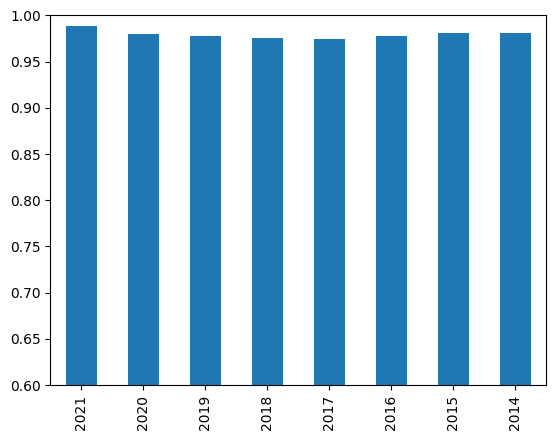

In [ ]:
import matplotlib.pyplot as plt
fin_cos['국도화학'].index = ['2021','2020','2019','2018','2017','2016','2015','2014']
fin_cos['국도화학'].plot.bar()
plt.ylim(0.6,1)

In [ ]:
fin_cos['이연제약'].index = ['2021','2020','2019','2018','2017','2016','2015','2014']

(0.6, 1.0)

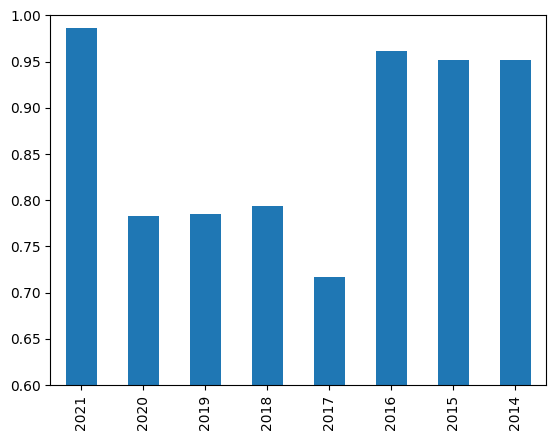

In [ ]:
fin_cos['이연제약'].plot.bar()
plt.ylim(0.6,1)